# Install relevant libraries

In [1]:
"""!pip install pandas numpy
!pip install nltk
!pip install scikit-learn
!pip install wordcloud"""

'!pip install pandas numpy\n!pip install nltk\n!pip install scikit-learn\n!pip install wordcloud'

- `pip install pandas numpy`: Installs core libraries used for data manipulation and numerical computations.  
- `pip install nltk`: Installs the Natural Language Toolkit for text preprocessing tasks such as tokenization, stopword removal, and lemmatization.  
- `pip install scikit-learn`: Installs Scikit-learn, which provides machine learning models, feature extraction, and evaluation metrics.  
- `pip install wordcloud`: Installs the WordCloud library for visualizing the most frequent words in the text data.  

**Insights:**

These installation commands ensure that all required libraries for data processing, NLP preprocessing, machine learning, evaluation, and visualization are available before building and running the fake news detection system.

---

# Import relevant libraries

In [1]:
import pandas as pd
import numpy as np

# For plotting a graph
import matplotlib.pyplot as plt
import seaborn as sns
# Regex
import re
# Text Preprocessing
import nltk
# Stop-word removal
from nltk.corpus import stopwords
nltk.download('stopwords')
# Lemmatisation
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
#library that contains punctuation
import string
string.punctuation
# Tokenisation
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('punkt_tab')
# Wordcloud for displaying frequent words
from wordcloud import WordCloud
# Import for training/testing
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer  # feature extraction
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# evaluation metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV  # Hyperparameter tuning

from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import pandas as pd

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/natashababu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/natashababu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/natashababu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/natashababu/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


- `pandas (pd)`, `numpy (np)`: Used for data manipulation, analysis, and numerical operations.  
- `matplotlib.pyplot`, `seaborn`: Used for data visualization such as bar charts, heatmaps, ROC curves, and comparisons.  
- `re`: Provides regular expression support for text cleaning (e.g., removing URLs).  
- `nltk`: Core library for natural language processing tasks.  
- `stopwords`: Supplies common English stopwords for text cleaning.  
- `WordNetLemmatizer`: Reduces words to their base (lemma) form.  
- `string.punctuation`: Provides a list of punctuation characters for removal.  
- `word_tokenize`: Splits text into individual words (tokens).  
- `WordCloud`: Generates word cloud visualizations of frequent words.  
- `train_test_split`: Splits data into training and testing sets.  
- `TfidfVectorizer`: Converts text into numerical TF-IDF features.  
- `LogisticRegression`: Machine learning model for binary text classification.  
- `SVC`: Support Vector Machine model for classification.  
- `accuracy_score`, `confusion_matrix`, `classification_report`: Metrics for evaluating classification models.  
- `GridSearchCV`: Performs hyperparameter tuning using cross-validation.  
- `precision_recall_fscore_support`: Computes precision, recall, and F1-score.  
- `roc_curve`, `auc`: Used to evaluate model performance using ROC–AUC analysis.  
- `precision_recall_curve`, `average_precision_score`: Used for precision–recall evaluation, especially for imbalanced data.  

**Insights:**

These imports collectively support the full fake news detection pipeline—from data loading and text preprocessing, to feature extraction, model training, hyperparameter tuning, evaluation, and visualization. They ensure the workflow is well-structured, reproducible, and suitable for robust NLP-based classification.


---
# Import COVID-19 Fake News Dataset

In [4]:
df = pd.read_excel("fake_new_dataset.xlsx")
df.head(7)

,Unnamed: 0,title,text,subcategory,label
0,0,FACEBOOK DELETES MICHIGAN ANTI-LOCKDOWN GROUP ...,Facebook has shuttered a popular group for Mic...,false news,0
1,1,Other Viewpoints: COVID-19 is worse than the flu,We can now officially put to rest all comparis...,true,1
2,2,Bermuda's COVID-19 cases surpass 100,The Ministry of Health in Bermuda has confirme...,true,1
3,3,Purdue University says students face 'close to...,"Purdue University President Mitch Daniels, the...",partially false,0
4,4,THE HIGH COST OF LOCKING DOWN AMERICA: “WE’VE ...,Locking down much of the country may have help...,false news,0
5,5,NY TIMES WORRIES HALF OF AMERICANS WILL REFUSE...,The New York Times has published an article by...,false news,0
6,6,Delhi: Eight nurses test positive for Covid-19...,Delhi: Eight nurses test positive for Covid-19...,true,1


- `pd.read_excel()`: Reads the dataset file and stores it as a pandas DataFrame `df`.
- `df.head(7)`: Displays the first 7 rows of the DataFrame to quickly inspect the data.
---

# EDA

In [7]:
df.dtypes

Unnamed: 0      int64
title          object
text           object
subcategory    object
label           int64
dtype: object

- `df.dtypes`: Displays the data type of each column.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3119 entries, 0 to 3118
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   3119 non-null   int64 
 1   title        3118 non-null   object
 2   text         3119 non-null   object
 3   subcategory  3119 non-null   object
 4   label        3119 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 122.0+ KB


- `df.info()`: Provides a concise summary of the DataFrame, including column names, non-null counts, and data types.
- 3119 rows, 5 columns
- int64: 2
- object: 3

In [11]:
df.shape

(3119, 5)

- `df.shape`: Returns the number of rows and columns as a tuple (rows, columns).

In [13]:
df.nunique()

Unnamed: 0     3003
title          2744
text           3060
subcategory       3
label             2
dtype: int64

- `df.nunique()`: Returns the number of unique values in each column of the DataFrame.

---
# Check missing values

In [16]:
missing = df.isnull().sum()
missing

Unnamed: 0     0
title          1
text           0
subcategory    0
label          0
dtype: int64

- `df.isnull().sum()`: Calculates the number of missing (null) values in each column.  
- `missing`: Displays the result of the missing values count.

In [18]:
df[df.isnull().any(axis=1)]

,Unnamed: 0,title,text,subcategory,label
84,84,NaN,Can someone tell these fucking idiots in Perth...,false news,0


- `df[df.isnull().any(axis=1)]`: Selects and displays all rows in the DataFrame that contain at least one missing (null) value.

---
# Check duplicate values

In [21]:
duplicate = df.duplicated().sum()
duplicate

0

- `df.duplicated().sum()`: Counts the number of duplicate rows in the DataFrame.  
- `duplicate`: Displays the total number of duplicate rows.
  
Checking missing and duplicate values to ensure data integrity before model training.

---
# Replace Missing Value with Empty String

In [24]:
df["title"] = df["title"].fillna("")

- `df["title"].fillna("")`: Replaces all missing (null) values in the `title` column with an empty string.  

Since the model is going to be trained on combined textual input (title + text), the missing value in "title" is handled by replacing individual missing fields with an empty string because the main content for the text classification still exists in "text", and dropping the row would unnecessarily lead to valid data loss.

---
# Drop irrelevant column

In [27]:
df = df.drop(columns=['Unnamed: 0'])
df.head()

,title,text,subcategory,label
0,FACEBOOK DELETES MICHIGAN ANTI-LOCKDOWN GROUP ...,Facebook has shuttered a popular group for Mic...,false news,0
1,Other Viewpoints: COVID-19 is worse than the flu,We can now officially put to rest all comparis...,true,1
2,Bermuda's COVID-19 cases surpass 100,The Ministry of Health in Bermuda has confirme...,true,1
3,Purdue University says students face 'close to...,"Purdue University President Mitch Daniels, the...",partially false,0
4,THE HIGH COST OF LOCKING DOWN AMERICA: “WE’VE ...,Locking down much of the country may have help...,false news,0


- `df.drop(columns=['Unnamed: 0'])`: Removes the column named `Unnamed: 0` from the DataFrame.  
- `df.head()`: Displays the first 5 rows of the updated DataFrame.

---
# Visualising Class Distribution

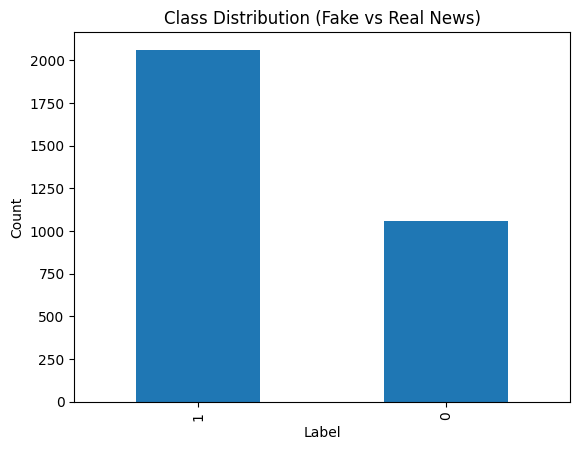

In [30]:
df['label'].value_counts().plot(kind='bar')
plt.title("Class Distribution (Fake vs Real News)")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

- `df['label'].value_counts().plot(kind='bar')`: Counts the occurrences of each class in the `label` column and creates a bar plot.  
- `plt.title("Class Distribution (Fake vs Real News)")`: Sets the title of the plot.  
- `plt.xlabel("Label")`: Labels the x-axis as "Label".  
- `plt.ylabel("Count")`: Labels the y-axis as "Count".  
- `plt.show()`: Displays the plot.  

**Insights:**

The bar chart helps to visualise the distribution of fake vs real news. From the plot, we can see if the dataset is **balanced or imbalanced**, which is important for choosing the right modelling approach and evaluation metrics.

The dataset is imbalanced, with true news instances outnumbering fake news motivating the use of class weighting during model training.

In [32]:
df['label'].value_counts()

label
1    2061
0    1058
Name: count, dtype: int64

- `df['label'].value_counts()`: Counts the number of occurrences of each class (fake vs real news) in the `label` column.  

**Insights:**

This output provides a clear numeric view of the class distribution. It helps identify whether the dataset is **balanced or imbalanced**, which is crucial for selecting appropriate machine learning algorithms and evaluation metrics.

---
# Visualisation of Subcategories distribution

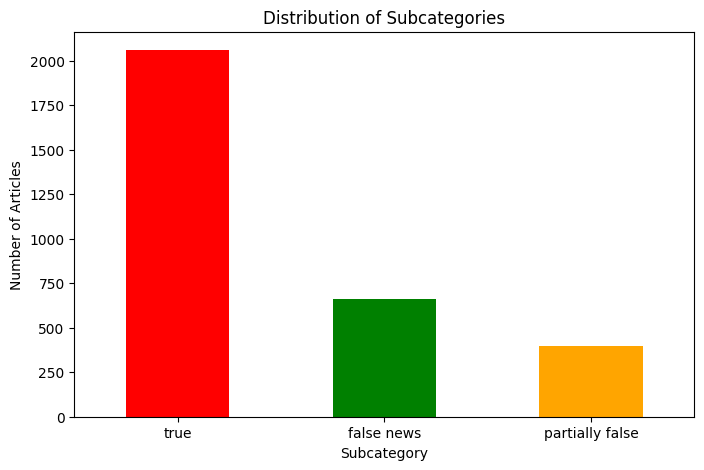

In [35]:
# Count the number of occurrences in each subcategory
counts = df['subcategory'].value_counts()

# Plot a bar chart
plt.figure(figsize=(8, 5))
counts.plot(kind='bar', color=['red', 'green', 'orange'])
plt.title('Distribution of Subcategories')
plt.xlabel('Subcategory')
plt.ylabel('Number of Articles')
plt.xticks(rotation=0)
plt.show()

- `df['subcategory'].value_counts()`: Counts the number of occurrences for each unique subcategory in the dataset.  
- `plt.figure(figsize=(8, 5))`: Sets the size of the plot.  
- `counts.plot(kind='bar', color=['red', 'green', 'orange'])`: Creates a bar chart of subcategory counts with specified colors.   

**Insights:**

The bar chart shows how articles are distributed across different subcategories. It helps identify which subcategories have more or fewer articles, guiding potential data balancing or analysis strategies.

---
# Visualising word count per text for both labels

In [38]:
df['text_length'] = df['text'].apply(len)
df['word_count'] = df['text'].apply(lambda x: len(x.split()))

- `df['text_length'] = df['text'].apply(len)`: Creates a new column `text_length` that stores the number of characters in each article's text.  
- `df['word_count'] = df['text'].apply(lambda x: len(x.split()))`: Creates a new column `word_count` that stores the number of words in each article's text.  

**Insights:**

These features help analyze the length of articles in terms of characters and words. They can be useful for text preprocessing, feature engineering, and understanding differences between fake and real news articles.

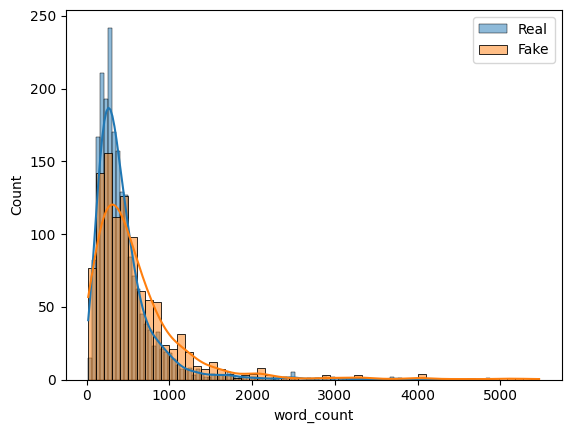

In [40]:
sns.histplot(df[df['label']==1]['word_count'], label='Real', kde=True)
sns.histplot(df[df['label']==0]['word_count'], label='Fake', kde=True)
plt.legend()
plt.show()

- `sns.histplot(df[df['label']==1]['word_count'], label='Real', kde=True)`: Plots a histogram with a KDE curve for the word count of real news articles.  
- `sns.histplot(df[df['label']==0]['word_count'], label='Fake', kde=True)`: Plots a histogram with a KDE curve for the word count of fake news articles.  
- `plt.legend()`: Adds a legend to distinguish between real and fake news.    

**Insights:**

The histogram shows the distribution of word counts for fake vs real news articles. It helps identify whether fake and real news tend to differ in length, which can be a useful feature for classification models.

---
# Combine fields

In [43]:
df['combined_text'] = df['title'] + " " + df['text']
df.head()

,title,text,subcategory,label,text_length,word_count,combined_text
0,FACEBOOK DELETES MICHIGAN ANTI-LOCKDOWN GROUP ...,Facebook has shuttered a popular group for Mic...,false news,0,2959,452,FACEBOOK DELETES MICHIGAN ANTI-LOCKDOWN GROUP ...
1,Other Viewpoints: COVID-19 is worse than the flu,We can now officially put to rest all comparis...,true,1,1106,183,Other Viewpoints: COVID-19 is worse than the f...
2,Bermuda's COVID-19 cases surpass 100,The Ministry of Health in Bermuda has confirme...,true,1,907,146,Bermuda's COVID-19 cases surpass 100 The Minis...
3,Purdue University says students face 'close to...,"Purdue University President Mitch Daniels, the...",partially false,0,3205,520,Purdue University says students face 'close to...
4,THE HIGH COST OF LOCKING DOWN AMERICA: “WE’VE ...,Locking down much of the country may have help...,false news,0,18874,3230,THE HIGH COST OF LOCKING DOWN AMERICA: “WE’VE ...


- `df['combined_text']`: Combines the `title` and `text` columns into a single column for easier text analysis.  

**Insights:**

Combining title and text creates a unified text field, which is useful for feature extraction and building NLP models for fake news detection.

In [45]:
df['combined_text'].isnull().sum()

0

- `df['combined_text'].isnull().sum()`: Counts the number of missing values in the `combined_text` column.  

**Insights:**

This helps ensure that the combined text column has no missing values, which is important before performing text preprocessing or model training.

In [47]:
df['original_text'] = df['combined_text'].copy()
df['original_text'][0]

'FACEBOOK DELETES MICHIGAN ANTI-LOCKDOWN GROUP WITH 380,000 MEMBERS Facebook has shuttered a popular group for Michiganders who oppose their governor’s extreme lockdown measures, fueling debate about free speech during the coronavirus crisis.\n\n‘Michiganders Against Excessive Quarantine’ had more than 380,000 members, with media reports describing it as one of the largest anti-lockdown groups in the nation. It’s not clear if Facebook has provided an explanation for the group’s removal.\n\nVisiting the page gives the following message: “Sorry, this content isn’t available right now.”\n\nGarrett Soldano of Mattawan, Michigan created Michiganders Against Excessive Quarantine in April after becoming disenchanted with Governor Gretchen Whitmer’s stay-at-home order – a policy which he initially supported.\n\nThe group made headlines around the world after organizing ‘Operation Gridlock’, a protest in which thousands of cars created bumper-to-bumper traffic in the capital, Lansing.\n\nProtes

- `df['original_text'] = df['combined_text'].copy()`: makes a separate copy of the text column.

- `df['original_text'][0]`: shows the first original text entry of first index only.

---
# Text Preprocessing

## 1. Lowercasing

In [51]:
def lowercase_text(text):
    return text.lower()

# Overwrite original columns safely
df['lower_text'] = df['combined_text'].apply(lowercase_text)
df[['original_text', 'lower_text']].head(3)

,original_text,lower_text
0,FACEBOOK DELETES MICHIGAN ANTI-LOCKDOWN GROUP ...,facebook deletes michigan anti-lockdown group ...
1,Other Viewpoints: COVID-19 is worse than the f...,other viewpoints: covid-19 is worse than the f...
2,Bermuda's COVID-19 cases surpass 100 The Minis...,bermuda's covid-19 cases surpass 100 the minis...


- `def lowercase_text(text)`: Defines a function to convert text to lowercase.  
- `df['combined_text'].apply(lowercase_text)`: Applies the lowercase function to the `combined_text` column. 

**Insights:**

Converting all text to lowercase standardizes the data, reducing variations caused by capitalization, which improves text analysis and model performance.

---
## 2. Remove URLS

In [54]:
def remove_urls(text):
    return re.sub(r'https?://\S+|www\.\S+', "", text)

df['no_url'] = df['lower_text'].apply(remove_urls)
df[['original_text', 'no_url']].head(3)

,original_text,no_url
0,FACEBOOK DELETES MICHIGAN ANTI-LOCKDOWN GROUP ...,facebook deletes michigan anti-lockdown group ...
1,Other Viewpoints: COVID-19 is worse than the f...,other viewpoints: covid-19 is worse than the f...
2,Bermuda's COVID-19 cases surpass 100 The Minis...,bermuda's covid-19 cases surpass 100 the minis...


- `def remove_urls(text)`: Defines a function to remove URLs from a text string using regular expressions.  
- `df['no_url'] = df['lower_text'].apply(remove_urls)`: Applies the URL-removal function to the `lower_text` column and saves it to `no_url` column.

**Insights:**

Removing URLs cleans the text by eliminating irrelevant links, which improves the quality of text data for analysis or model training. 

---

## 3. Remove punctuation and characters

In [57]:
#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree=re.sub(r'[^a-z\s]', '', text) # match any character that is not a lowercase letter (a–z) and not a space
    return punctuationfree
    
#storing the puntuation free text
df['no_char'] = df['no_url'].apply(remove_punctuation)
df[['original_text', 'no_char']].head(3)

,original_text,no_char
0,FACEBOOK DELETES MICHIGAN ANTI-LOCKDOWN GROUP ...,facebook deletes michigan antilockdown group w...
1,Other Viewpoints: COVID-19 is worse than the f...,other viewpoints covid is worse than the flu w...
2,Bermuda's COVID-19 cases surpass 100 The Minis...,bermudas covid cases surpass the ministry of ...


- `def remove_punctuation(text)`: Defines a function to remove all punctuation from a text string.  
- `df['no_char'] = df['no_url'].apply(remove_punctuation)`: Applies the punctuation-removal function to the `no_url` column
- `df[['original_text', 'no_char']].head(3)`: Displays the first 3 rows of the updated DataFrame.  

**Insights:**

Removing punctuation helps clean the text data, reducing noise and improving the quality of features for text analysis or NLP models.


---
## 4. Tokenization

In [60]:
def tokenize_text(text):
    return word_tokenize(text)
    
df['tokens'] = df['no_char'].apply(tokenize_text)
df[['original_text', 'tokens']].head(3)

,original_text,tokens
0,FACEBOOK DELETES MICHIGAN ANTI-LOCKDOWN GROUP ...,"[facebook, deletes, michigan, antilockdown, gr..."
1,Other Viewpoints: COVID-19 is worse than the f...,"[other, viewpoints, covid, is, worse, than, th..."
2,Bermuda's COVID-19 cases surpass 100 The Minis...,"[bermudas, covid, cases, surpass, the, ministr..."


 - `def tokenize_text(text)`: Defines a function to tokenize text into individual words.  
- `df['no_char'].apply(tokenize_text)`: Applies the tokenization function to the `no_char` column.    

**Insights:**

Tokenizing the text breaks it into individual words, which is essential for most NLP tasks like feature extraction, text analysis.

---
## 5. Stop-word Removal

In [64]:
stop_words = nltk.corpus.stopwords.words('english')

def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

df['stopword'] = df['tokens'].apply(remove_stopwords)
df[['original_text', 'stopword']].head(3)

,original_text,stopword
0,FACEBOOK DELETES MICHIGAN ANTI-LOCKDOWN GROUP ...,"[facebook, deletes, michigan, antilockdown, gr..."
1,Other Viewpoints: COVID-19 is worse than the f...,"[viewpoints, covid, worse, flu, officially, pu..."
2,Bermuda's COVID-19 cases surpass 100 The Minis...,"[bermudas, covid, cases, surpass, ministry, he..."


- `stop_words = nltk.corpus.stopwords.words('english')`: Loads a list of common English stopwords from NLTK.  
- `def remove_stopwords(tokens)`: Defines a function to remove stopwords from a list of tokens.  
- `df['stopword'] = df['tokens'].apply(remove_stopwords)`: Applies the stopword-removal function to the `tokens` column.   

**Insights:**

Removing stopwords eliminates common, non-informative words ("the", "is", "and") from the text, which reduces noise and improves the relevance of features for NLP models.


---
## 6. Lemmatization

In [67]:
def lemmatize_word(text):
  wordnet = WordNetLemmatizer()
  return " ".join([wordnet.lemmatize(word) for word in text])
df['preprocessed_text'] = df['stopword'].apply(lemmatize_word)
df[['original_text', 'preprocessed_text']].head(3)

,original_text,preprocessed_text
0,FACEBOOK DELETES MICHIGAN ANTI-LOCKDOWN GROUP ...,facebook deletes michigan antilockdown group m...
1,Other Viewpoints: COVID-19 is worse than the f...,viewpoint covid worse flu officially put rest ...
2,Bermuda's COVID-19 cases surpass 100 The Minis...,bermuda covid case surpass ministry health ber...


- `def lemmatize_word(text)`: Defines a function to lemmatize each word in the text, reducing it to its base form.  
- `df['preprocessed_text'] = df['stopword'].apply(lemmatize_word)`: Applies the lemmatization function to the `stopword` column.  

**Insights:**

Lemmatization reduces words to their root forms (e.g., "running" to "run"), which standardizes the text and helps improve model performance by reducing redundancy in features.

In [69]:
df['preprocessed_text'][0]

'facebook deletes michigan antilockdown group member facebook shuttered popular group michigander oppose governor extreme lockdown measure fueling debate free speech coronavirus crisis michigander excessive quarantine member medium report describing one largest antilockdown group nation clear facebook provided explanation group removal visiting page give following message sorry content isnt available right garrett soldano mattawan michigan created michigander excessive quarantine april becoming disenchanted governor gretchen whitmers stayathome order policy initially supported group made headline around world organizing operation gridlock protest thousand car created bumpertobumper traffic capital lansing protester encouraged stay automobile adhere social distancing guideline however several hundred demonstrator ended rallying outside state house many member group used space talk depression financial hardship experiencing result governor executive order first enacted march forced nones

- Displays data of the first index of `df['preprocessed_text']` column.

---
# Most Frequent Term in overall text corpus

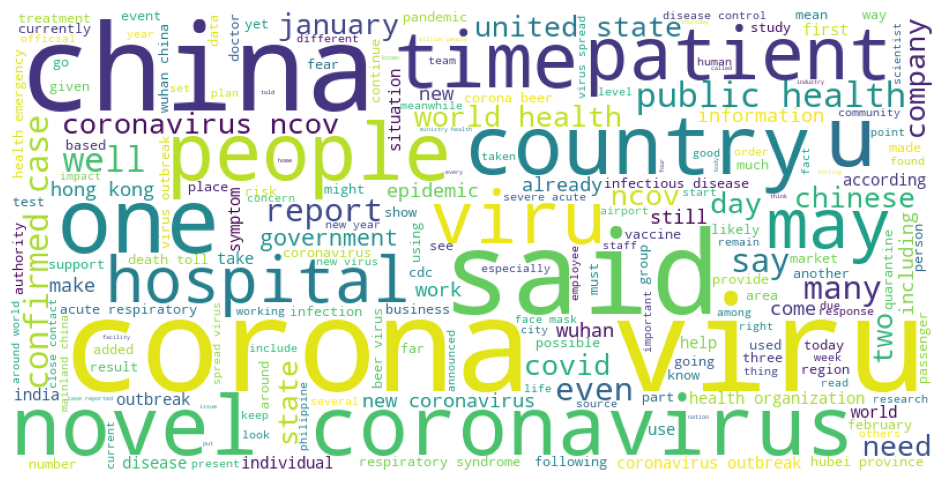

In [72]:
# Combine all text
all_text = ' '.join(df['preprocessed_text'])

# Generate word cloud
wc = WordCloud(
    width=800, 
    height=400, 
    background_color='white',
    colormap='viridis',   # choose color
).generate(all_text)

# Convert to PIL image
image = wc.to_image()

# Plot
plt.figure(figsize=(12, 6))
plt.imshow(image)  # Pass PIL image, not WordCloud object
plt.axis('off')
plt.show()

 - `' '.join(df['preprocessed_text'])`: Combines all text from the `preprocessed_text` column into a single string.  
- `WordCloud().generate(all_text)`: Creates a word cloud from the combined text with specified dimensions, background color, and colormap.  
- `wc.to_image()`: Converts the word cloud object into a PIL image for plotting.  
- `plt.imshow(image)`: Displays the word cloud image.  
- `plt.axis('off')`: Hides the axes for a cleaner visualization.    

**Insights:**

The word cloud visually highlights the most frequent words in the dataset, helping identify dominant topics and common terms in the articles.


---
# Split data into train and test

In [75]:
# Features as two separate columns
X = df['preprocessed_text']  # keep as DataFrame with two columns
y = df['label']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

- Selects `df['preprocessed_text']` for input features and `df['label']` for target labels.
- Splits data into 80% training and 20% testing while keeping class balance (`stratify=y`).

---
# TF-IDF Vectorisation

In [99]:
tfidf = TfidfVectorizer(
    # max_features=20000
    max_features=5000, #limit to 5k most important features, 
    ngram_range=(1,2), # unigrams + bigrams, (1,1)
    min_df=2,
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

- `TfidfVectorizer()`: Initializes the TF-IDF vectorizer with a maximum of 5000 features, considering unigrams and bigrams, and ignoring very rare words.  
- `tfidf.fit_transform(X_train)`: Fits the vectorizer on the training data and transforms it into TF-IDF feature vectors.  
- `tfidf.transform(X_test)`: Transforms the test data into TF-IDF feature vectors using the same vocabulary learned from the training data.  

**Insights:**

TF-IDF converts text into numerical features reflecting word importance, enabling machine learning models to process textual data for classification.


In [101]:
print("TF-IDF Train Shape:", X_train_tfidf.shape)
print("TF-IDF Test Shape :", X_test_tfidf.shape)

TF-IDF Train Shape: (2495, 5000)
TF-IDF Test Shape : (624, 5000)


2495: Number of documents   
5000: Number of features

---
# Base Model

## Train Logistic Regression

In [105]:
#lr = LogisticRegression(max_iter=1000)
lr = LogisticRegression(solver='liblinear', max_iter=1000, class_weight='balanced')
lr.fit(X_train_tfidf, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, solver='liblinear')

- `LogisticRegression(solver='liblinear', max_iter=1000, class_weight='balanced')`: Initializes a Logistic Regression model with the 'liblinear' solver, a maximum of 1000 iterations, and balanced class weights to handle class imbalance.  
- `lr.fit(X_train_tfidf, y_train)`: Trains the Logistic Regression model on the TF-IDF features of the training data.  

**Insights:**

The Logistic Regression model learns to classify articles as fake or real based on TF-IDF features, with class weighting helping improve performance on imbalanced datasets.


In [107]:
# predicting on training data
y_train_lr = lr.predict(X_train_tfidf)

print("Accuracy Score: ", accuracy_score(y_train, y_train_lr))
print("Logistic Regression Classification Report: Training Data")
print(classification_report(y_train, y_train_lr))
print("Confusion Matrix: Training Data")
print(confusion_matrix(y_train, y_train_lr))

Accuracy Score:  0.87374749498998
Logistic Regression Classification Report: Training Data
              precision    recall  f1-score   support

           0       0.79      0.86      0.82       846
           1       0.92      0.88      0.90      1649

    accuracy                           0.87      2495
   macro avg       0.86      0.87      0.86      2495
weighted avg       0.88      0.87      0.87      2495

Confusion Matrix: Training Data
[[ 727  119]
 [ 196 1453]]


- `lr.predict(X_train_tfidf)`: Generates predictions on the training data using LR.
- `accuracy_score(y_train, y_train_lr)`: Calculates training accuracy.
- `classification_report()`: Displays precision, recall, and F1-score.
- `confusion_matrix()`: Shows correct vs incorrect predictions.

**Insights:**
Evaluates how well the Logistic Regression model fits the training data.

In [109]:
# predicting on testing data
y_pred_lr = lr.predict(X_test_tfidf)

- `lr.predict(X_test_tfidf)`: Uses the trained Logistic Regression model to predict labels for the test set based on TF-IDF features. 

**Insights:**

This step generates predictions for the test articles, which can be used to assess the Logistic Regression model’s performance using metrics like accuracy, precision, recall, and F1-score.


In [111]:
print("Accuracy Score: ", accuracy_score(y_test, y_pred_lr))
print("Logistic Regression Classification Report: Testing Data")
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix: Testing Data")
print(confusion_matrix(y_test, y_pred_lr))

Accuracy Score:  0.7964743589743589
Logistic Regression Classification Report: Testing Data
              precision    recall  f1-score   support

           0       0.68      0.75      0.72       212
           1       0.87      0.82      0.84       412

    accuracy                           0.80       624
   macro avg       0.77      0.79      0.78       624
weighted avg       0.80      0.80      0.80       624

Confusion Matrix: Testing Data
[[160  52]
 [ 75 337]]


**Insights:**

These metrics evaluate the performance of the Logistic Regression model. Accuracy shows overall correctness, the classification report provides class-wise performance, and the confusion matrix highlights where the model makes correct or incorrect predictions, guiding further improvements.


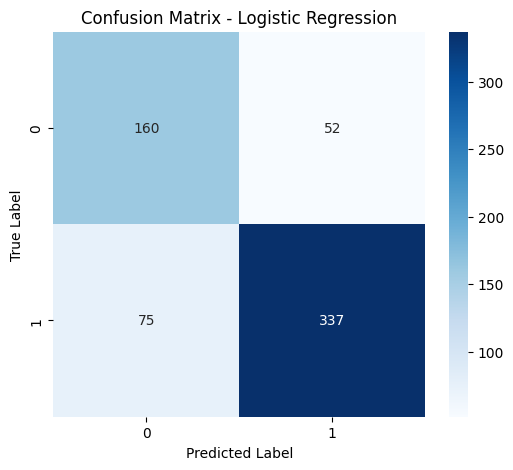

In [113]:
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Plot confusion matrix as heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=lr.classes_, yticklabels=lr.classes_)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

- `confusion_matrix(y_test, y_pred_lr)`: Computes the confusion matrix for Logistic Regression predictions.  
- `sns.heatmap()`: Plots the confusion matrix as a heatmap with annotations for easier visualization.  

**Insights:**

- **True Negatives (TN) = 160**: Fake news correctly predicted as fake.  
- **False Positives (FP) = 52**: Fake news incorrectly predicted as real.  
- **False Negatives (FN) = 75**: Real news incorrectly predicted as fake.  
- **True Positives (TP) = 337**: Real news correctly predicted as real.  


- The model accurately identifies most real news (TP = 337) and fake news (TN = 160).  
- Misclassifications occur for 52 fake news articles predicted as real (FP) and 75 real news articles predicted as fake (FN).  
- This indicates the model is stronger at detecting real news than fake news, and improvements could focus on reducing false positives for fake news detection.

---
## Train Support Vector Machine (SVC)

In [116]:
"""svm = SVC(class_weight="balanced", kernel="linear")
svm.fit(X_train_tfidf, y_train)"""

'svm = SVC(class_weight="balanced", kernel="linear")\nsvm.fit(X_train_tfidf, y_train)'

In [117]:
from sklearn.svm import LinearSVC

lrsvc = LinearSVC(
    C=0.1,                   
    class_weight='balanced',
    max_iter=5000
)

lrsvc.fit(X_train_tfidf, y_train)

LinearSVC(C=0.1, class_weight='balanced', max_iter=5000)

- `LinearSVC()`: Initializes a linear SVM with regularization and balanced class weights.

- `lrsvc.fit(X_train_tfidf, y_train)`: Trains the model on TF-IDF features.

In [119]:
# predicting on training data
y_train_svm = lrsvc.predict(X_train_tfidf)

print("Accuracy Score: ", accuracy_score(y_train, y_train_svm))
print("SVM Classification Report: Training Data")
print(classification_report(y_train, y_train_svm))
print("Confusion Matrix: Training Data")
print(confusion_matrix(y_train, y_train_svm))

Accuracy Score:  0.8729458917835672
SVM Classification Report: Training Data
              precision    recall  f1-score   support

           0       0.79      0.86      0.82       846
           1       0.92      0.88      0.90      1649

    accuracy                           0.87      2495
   macro avg       0.86      0.87      0.86      2495
weighted avg       0.88      0.87      0.87      2495

Confusion Matrix: Training Data
[[ 725  121]
 [ 196 1453]]


* `lrsvc.predict(X_train_tfidf)`: Predicts class labels for the training data using Linear SVM.

**Insights:**
Used to evaluate how well the Linear SVM fits the training data and to check for potential overfitting.

In [121]:
y_pred_svm = lrsvc.predict(X_test_tfidf) # Uses the trained SVM model to predict the labels of the test data

**Insights:**

This step generates predictions for the test articles, which can then be used to evaluate the model's performance using metrics like accuracy, precision, recall, and F1-score.


In [123]:
print("Accuracy Score: ", accuracy_score(y_test, y_pred_svm))
print("SVM Classification Report: Testing Data")
print(classification_report(y_test, y_pred_svm))
print("Confusion Matrix: Testing Data")
print(confusion_matrix(y_test, y_pred_svm))

Accuracy Score:  0.7964743589743589
SVM Classification Report: Testing Data
              precision    recall  f1-score   support

           0       0.68      0.75      0.71       212
           1       0.86      0.82      0.84       412

    accuracy                           0.80       624
   macro avg       0.77      0.78      0.78       624
weighted avg       0.80      0.80      0.80       624

Confusion Matrix: Testing Data
[[158  54]
 [ 73 339]]


**Insights:**

These metrics help evaluate the performance of the SVM model. Accuracy shows overall correctness, the classification report gives per-class performance, and the confusion matrix visualizes where the model is making correct or incorrect predictions, helping identify strengths and weaknesses.


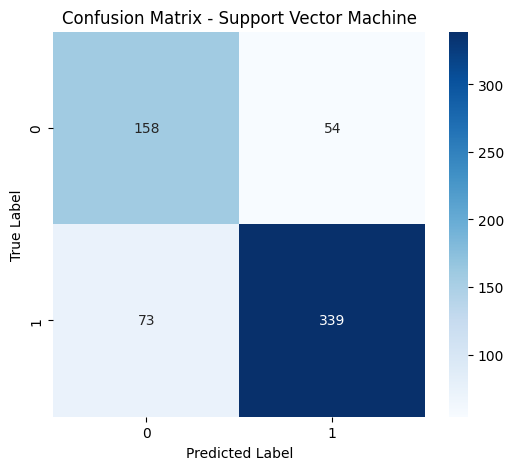

In [125]:
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Plot confusion matrix as heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=lrsvc.classes_, yticklabels=lrsvc.classes_)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix - Support Vector Machine')
plt.show()

- `confusion_matrix(y_test, y_pred_svm)`: Computes the confusion matrix for the SVM predictions.  

**Insights:**

- **True Negatives (TN) = 158**: Fake news correctly predicted as fake.  
- **False Positives (FP) = 54**: Fake news incorrectly predicted as real.  
- **False Negatives (FN) = 73**: Real news incorrectly predicted as fake.  
- **True Positives (TP) = 339**: Real news correctly predicted as real.  


- The model correctly identifies the majority of real news (TP = 339) and a significant portion of fake news (TN = 158).  
- There are some misclassifications: 54 fake news predicted as real (FP) and 73 real news predicted as fake (FN).  
- This suggests the model is reasonably effective but slightly weaker at detecting fake news compared to real news.

---
# Comparison Graph: Logistic Regression VS Support Vector Machine

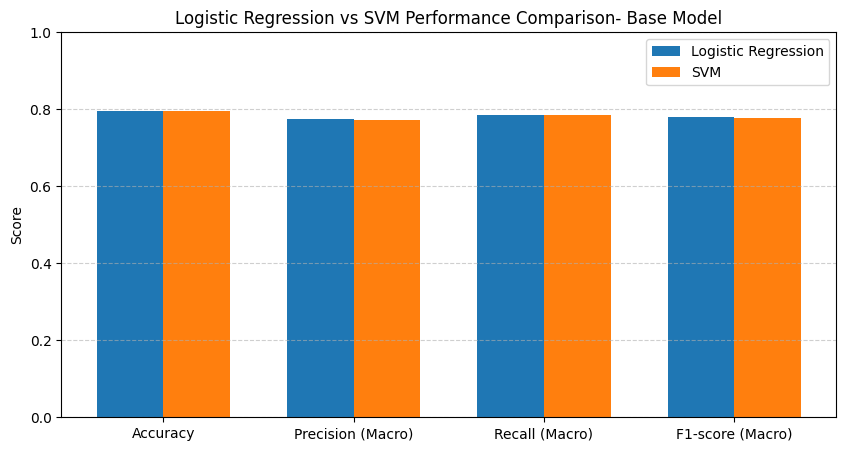

In [128]:
# Calculate metrics for Logistic Regression
acc_lr = accuracy_score(y_test, y_pred_lr)
prec_lr, rec_lr, f1_lr, _ = precision_recall_fscore_support(
    y_test, y_pred_lr, average='macro'
)

# Calculate metrics for SVM
acc_svm = accuracy_score(y_test, y_pred_svm)
prec_svm, rec_svm, f1_svm, _ = precision_recall_fscore_support(
    y_test, y_pred_svm, average='macro'
)

# Metric labels
metrics = ['Accuracy', 'Precision (Macro)', 'Recall (Macro)', 'F1-score (Macro)']

lr_scores = [acc_lr, prec_lr, rec_lr, f1_lr]
svm_scores = [acc_svm, prec_svm, rec_svm, f1_svm]

x = np.arange(len(metrics))
width = 0.35

# Plot
plt.figure(figsize=(10,5))
plt.bar(x - width/2, lr_scores, width, label='Logistic Regression')
plt.bar(x + width/2, svm_scores, width, label='SVM')

plt.xticks(x, metrics)
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('Logistic Regression vs SVM Performance Comparison- Base Model')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

- `accuracy_score()`: Computes the accuracy for Logistic Regression and SVM models.  
- `precision_recall_fscore_support()`: Calculates macro-averaged precision, recall, and F1-score for fair comparison across classes.  
- `metrics`: Defines the evaluation metrics used for comparison.  
- `lr_scores`, `svm_scores`: Stores performance scores for Logistic Regression and SVM respectively.  
- `plt.bar()`: Plots a grouped bar chart to compare model performance across metrics.  

**Insights:**

The bar chart provides a clear visual comparison between Logistic Regression and SVM across multiple evaluation metrics. It helps identify which model performs better overall and whether one model has advantages in precision, recall, or F1-score, especially important for imbalanced fake news classification tasks.

---
# Comparison Table

In [131]:
# Create comparison table
comparison_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machine'],
    'Accuracy': [acc_lr, acc_svm],
    'Precision (Macro)': [prec_lr, prec_svm],
    'Recall (Macro)': [rec_lr, rec_svm],
    'F1-score (Macro)': [f1_lr, f1_svm]
})

#Display table
comparison_df # Displays the performance comparison table

,Model,Accuracy,Precision (Macro),Recall (Macro),F1-score (Macro)
0,Logistic Regression,0.796474,0.773587,0.786339,0.778666
1,Support Vector Machine,0.796474,0.773289,0.784049,0.777777


- `pd.DataFrame()`: Creates a comparison table summarizing performance metrics of both models.  

**Insights:**

The comparison table provides a clear, numeric comparison between Logistic Regression and SVM across key evaluation metrics. It helps determine which model performs better overall and supports objective model selection for fake news classification.


---
# Hyperparameter Tuning

In [134]:
# TF-IDF Vectorisation
tfidf = TfidfVectorizer(
    max_features=7000, #10000, 8000, 5000, 6000
    ngram_range=(1,1), # unigrams only
    min_df=3,
    max_df=0.9,
    sublinear_tf=True
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

* Converts text into TF-IDF features with controlled vocabulary size.
* Uses only important single words and removes very rare/common terms.

**Insight:**
Helps reduce noise and overfitting while preserving meaningful text features.

## Hyperparameter tuning of Logistic Regression

In [138]:
# Logistic Regression tuning
"""param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],  #Regularisation strength
    'penalty': ['l2']  
}

grid_lr = GridSearchCV(
    LogisticRegression(class_weight='balanced', max_iter=1000),
    param_grid_lr,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
"""
lr = LogisticRegression(solver='liblinear', max_iter=1000)  # liblinear works well for small datasets

# Hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100], # Regularization strength
    'penalty': ['l1', 'l2'], # Regularization type
    'class_weight': [None, 'balanced'] # Handle class imbalance
}

# Grid search with 5-fold cross-validation
grid_lr = GridSearchCV(
    estimator=lr,
    param_grid=param_grid,
    cv=5,
    scoring='f1', # F1 score handles imbalance better
    verbose=2,
    n_jobs=-1
)

grid_lr.fit(X_train_tfidf, y_train)
print(grid_lr.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
{'C': 1, 'class_weight': None, 'penalty': 'l2'}


- `LogisticRegression(solver='liblinear', max_iter=1000)`: Initializes a Logistic Regression model suitable for small datasets.  
- `param_grid`: Defines a grid of hyperparameters (`C`, `penalty`, `class_weight`) to search over.  
- `GridSearchCV()`: Performs grid search with 5-fold cross-validation to find the best hyperparameters using F1-score.  
- `grid_lr.fit(X_train_tfidf, y_train)`: Trains multiple Logistic Regression models with all combinations of hyperparameters on the training data.  
- `grid_lr.best_params_`: Displays the combination of hyperparameters that achieved the best F1-score.  

**Insights:**

Grid search identifies the optimal hyperparameters for Logistic Regression, improving its ability to classify fake and real news, especially when dealing with class imbalance.


In [140]:
# Predictions
best_lr = grid_lr.best_estimator_

# predicting on training data
best_tr_lr = best_lr.predict(X_train_tfidf)

print("Accuracy Score: ", accuracy_score(y_train, best_tr_lr))
print("Logistic Regression Classification Report: Training Data")
print(classification_report(y_train, best_tr_lr))
print("Confusion Matrix: Training Data")
print(confusion_matrix(y_train, best_tr_lr))

Accuracy Score:  0.887374749498998
Logistic Regression Classification Report: Training Data
              precision    recall  f1-score   support

           0       0.91      0.74      0.82       846
           1       0.88      0.96      0.92      1649

    accuracy                           0.89      2495
   macro avg       0.90      0.85      0.87      2495
weighted avg       0.89      0.89      0.88      2495

Confusion Matrix: Training Data
[[ 624  222]
 [  59 1590]]


* `grid_lr.best_estimator_`: Selects the Logistic Regression model with the best hyperparameters from grid search.
* `best_lr.predict(X_train_tfidf)`: Predicts labels on the training data using the best model.

**Insights:**
Evaluates how well the tuned Logistic Regression fits the training data and checks for overfitting.

In [142]:
# predicting on testing data
best_pred_lr = best_lr.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, best_pred_lr))
print("\nLogistic Regression Classification Report: Testing Data\n", classification_report(y_test, best_pred_lr))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, best_pred_lr))

Accuracy: 0.8076923076923077

Logistic Regression Classification Report: Testing Data
               precision    recall  f1-score   support

           0       0.79      0.59      0.68       212
           1       0.81      0.92      0.86       412

    accuracy                           0.81       624
   macro avg       0.80      0.75      0.77       624
weighted avg       0.81      0.81      0.80       624


Confusion Matrix:
 [[125  87]
 [ 33 379]]


- `best_pred_lr = best_lr.predict(X_test_tfidf)`: Uses the best model to predict labels for the test set.

**Insights:**

These evaluation metrics show the performance of the tuned Logistic Regression model. Accuracy reflects overall correctness, the classification report provides detailed class-wise performance, and the confusion matrix helps visualize misclassifications and model effectiveness.


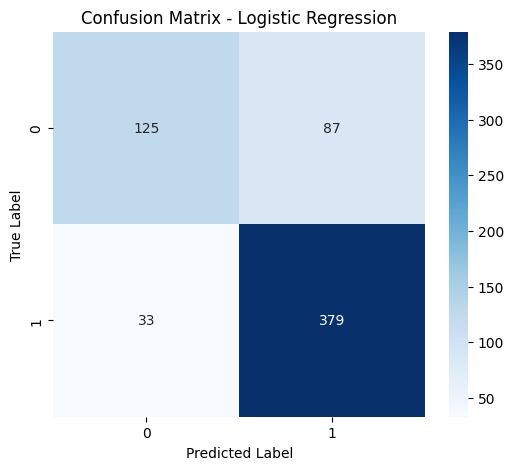

In [145]:
cm_lr = confusion_matrix(y_test, best_pred_lr)

# Plot confusion matrix as heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=best_lr.classes_, yticklabels=best_lr.classes_)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

**Insights:**

- **True Negatives (TN) = 125**: Fake news correctly predicted as fake.  
- **False Positives (FP) = 87**: Fake news incorrectly predicted as real.  
- **False Negatives (FN) = 33**: Real news incorrectly predicted as fake.  
- **True Positives (TP) = 379**: Real news correctly predicted as real.  

- The model performs very well on real news (TP = 379), but misclassifies a higher number of fake news articles (FP = 87).  
- Only a small number of real news articles are misclassified as fake (FN = 33).  
- This indicates that the model is stronger at detecting real news than fake news, and efforts could focus on reducing false positives to improve fake news detection.

---
# ROC Curve

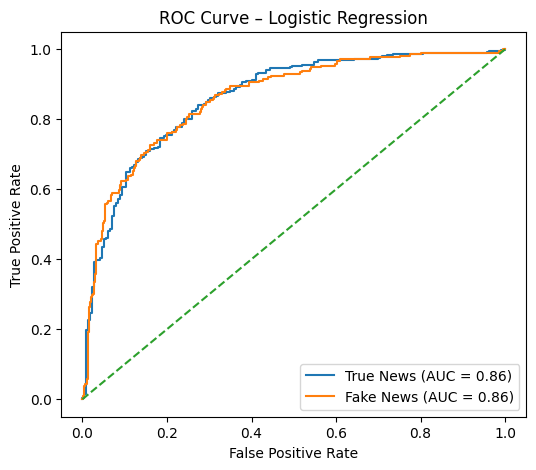

In [148]:
# Probabilities for Logistic Regression
y_score_lr = best_lr.predict_proba(X_test_tfidf)

# TRUE news as positive class (label = 1)
fpr_true, tpr_true, _ = roc_curve(y_test, y_score_lr[:, 1])
auc_true = auc(fpr_true, tpr_true)

# FAKE news as positive class (label = 0)
fpr_fake, tpr_fake, _ = roc_curve(1 - y_test, y_score_lr[:, 0])
auc_fake = auc(fpr_fake, tpr_fake)

plt.figure(figsize=(6,5))
plt.plot(fpr_true, tpr_true, label=f'True News (AUC = {auc_true:.2f})')
plt.plot(fpr_fake, tpr_fake, label=f'Fake News (AUC = {auc_fake:.2f})')
plt.plot([0,1], [0,1], linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – Logistic Regression')
plt.legend()
plt.show()

- `predict_proba()`: Computes class probabilities from the trained Logistic Regression model.  
- `roc_curve()`: Calculates false positive rate (FPR) and true positive rate (TPR) for ROC analysis.  
- `auc()`: Computes the Area Under the Curve (AUC) to summarize ROC performance.  
- `plt.plot()`: Plots ROC curves for both True News and Fake News classes.  
- `plt.plot([0,1],[0,1])`: Draws the baseline representing random classification.  

**Insights:**

The ROC curves illustrate how well the Logistic Regression model distinguishes between true and fake news across different thresholds. A higher AUC value indicates stronger discriminative ability, while curves closer to the diagonal suggest weaker performance.


---
# Precision-Recall Curve

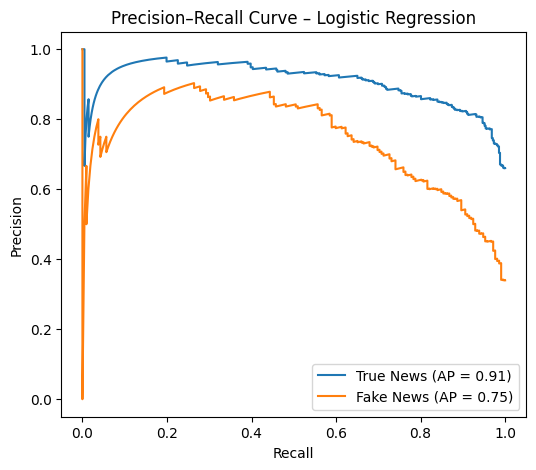

In [151]:
# TRUE news
precision_true, recall_true, _ = precision_recall_curve(y_test, y_score_lr[:, 1])
ap_true = average_precision_score(y_test, y_score_lr[:, 1])

# FAKE news
precision_fake, recall_fake, _ = precision_recall_curve(1 - y_test, y_score_lr[:, 0])
ap_fake = average_precision_score(1 - y_test, y_score_lr[:, 0])

plt.figure(figsize=(6,5))
plt.plot(recall_true, precision_true, label=f'True News (AP = {ap_true:.2f})')
plt.plot(recall_fake, precision_fake, label=f'Fake News (AP = {ap_fake:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision–Recall Curve – Logistic Regression')
plt.legend()
plt.show()

- `precision_recall_curve()`: Computes precision and recall values at different classification thresholds.  
- `average_precision_score()`: Calculates the Average Precision (AP) to summarize the precision–recall performance.  
- `plt.plot()`: Plots precision–recall curves for both True News and Fake News classes.   

**Insights:**

The precision–recall curves show the trade-off between precision and recall for true and fake news classification. Higher Average Precision (AP) values indicate better performance, especially important for imbalanced datasets where precision–recall analysis is more informative than accuracy alone.

--- 
# Hyperparameter tuning of Support Vector Machine(SVM)

In [154]:
param_grid = {'C': [0.01, 0.1, 0.5, 1]} # [0.01, 0.05, 0.1, 0.5, 1, 2, 5]

grid_svm = GridSearchCV(
    LinearSVC(class_weight='balanced', max_iter=5000),
    param_grid=param_grid,
    scoring='f1', #accuracy
    cv=5,
    n_jobs=-1,
    verbose=2 # Added
)

grid_svm.fit(X_train_tfidf, y_train)
print(grid_svm.best_params_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
{'C': 0.1}


In [157]:
"""svm = SVC()

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100], # Regularization parameter
    'kernel': ['linear', 'rbf'], # Linear or RBF kernel
    'class_weight': [None, 'balanced']
}

# Grid search with 5-fold cross-validation
grid_svm = GridSearchCV(
    estimator=svm,
    param_grid=param_grid,
    cv=5,
    scoring='f1',  # f1 is good for imbalanced classes
    verbose=2,
    n_jobs=-1
)

grid_svm.fit(X_train_tfidf, y_train)
print(grid_svm.best_params_)"""

"svm = SVC()\n\nparam_grid = {\n    'C': [0.01, 0.1, 1, 10, 100], # Regularization parameter\n    'kernel': ['linear', 'rbf'], # Linear or RBF kernel\n    'class_weight': [None, 'balanced']\n}\n\n# Grid search with 5-fold cross-validation\ngrid_svm = GridSearchCV(\n    estimator=svm,\n    param_grid=param_grid,\n    cv=5,\n    scoring='f1',  # f1 is good for imbalanced classes\n    verbose=2,\n    n_jobs=-1\n)\n\ngrid_svm.fit(X_train_tfidf, y_train)\nprint(grid_svm.best_params_)"

- `SVC()`: Initializes a Support Vector Machine classifier.  
- `param_grid`: Defines a grid of hyperparameters (`C`, `kernel`, `class_weight`) to search over.  
- `GridSearchCV()`: Performs a grid search with 5-fold cross-validation to find the best hyperparameters using F1-score.  
- `grid_svm.fit(X_train_tfidf, y_train)`: Trains multiple SVM models with all combinations of hyperparameters on the training data.  
- `grid_svm.best_params_`: Displays the combination of hyperparameters that achieved the best F1-score.  

**Insights:**

Grid search identifies the optimal hyperparameters for the SVM model, improving its ability to classify fake and real news effectively, especially in the presence of class imbalance.


In [185]:
# Prediction
best_svm = grid_svm.best_estimator_

# predicting on training data
best_tr_svm = best_svm.predict(X_train_tfidf)

print("Accuracy Score: ", accuracy_score(y_train, best_tr_svm))
print("SVM Classification Report: Training Data")
print(classification_report(y_train, best_tr_svm))
print("Confusion Matrix: Training Data")
print(confusion_matrix(y_train, best_tr_svm))

Accuracy Score:  0.8821643286573146
SVM Classification Report: Training Data
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       846
           1       0.93      0.89      0.91      1649

    accuracy                           0.88      2495
   macro avg       0.86      0.88      0.87      2495
weighted avg       0.89      0.88      0.88      2495

Confusion Matrix: Training Data
[[ 739  107]
 [ 187 1462]]


* `grid_svm.best_estimator_`: Selects the LinearSVC model with the best hyperparameters from grid search.
* `best_svm.predict(X_train_tfidf)`: Predicts labels on the training data using the best SVM model.

**Insights:**
Used to evaluate how well the tuned LinearSVC fits the training data and to check for overfitting.

In [188]:
# predicting on testing data
best_pred_svm = best_svm.predict(X_test_tfidf)

print("Accuracy Score:", accuracy_score(y_test, best_pred_svm))
print("\nSVM Classification Report: Testing Data\n", classification_report(y_test, best_pred_svm))
print("\nConfusion Matrix: Testing Data\n", confusion_matrix(y_test, best_pred_svm))

Accuracy Score: 0.7948717948717948

SVM Classification Report: Testing Data
               precision    recall  f1-score   support

           0       0.68      0.74      0.71       212
           1       0.86      0.83      0.84       412

    accuracy                           0.79       624
   macro avg       0.77      0.78      0.78       624
weighted avg       0.80      0.79      0.80       624


Confusion Matrix: Testing Data
 [[156  56]
 [ 72 340]]


- `best_pred_svm = best_svm.predict(X_test_tfidf)`: Uses the optimized SVM model to predict labels for the test set.

**Insights:**

These metrics evaluate the performance of the tuned SVM model. Accuracy reflects overall correctness, the classification report provides detailed class-wise performance, and the confusion matrix visualizes misclassifications and model effectiveness.


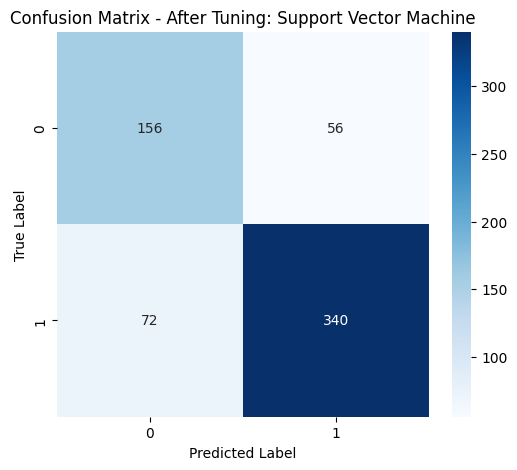

In [191]:
cm_svm = confusion_matrix(y_test, best_pred_svm)

# Plot confusion matrix as heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=best_svm.classes_, yticklabels=best_svm.classes_)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix - After Tuning: Support Vector Machine')
plt.show()

**Insights:**

- **True Negatives (TN) = 156**: Fake news correctly predicted as fake.  
- **False Positives (FP) = 56**: Fake news incorrectly predicted as real.  
- **False Negatives (FN) = 72**: Real news incorrectly predicted as fake.  
- **True Positives (TP) = 340**: Real news correctly predicted as real.  


- The model correctly identifies most real news (TP = 340) and a fair portion of fake news (TN = 156).  
- Misclassifications include 56 fake news predicted as real (FP) and 72 real news predicted as fake (FN).  
- The model is strong at detecting real news but slightly weaker at detecting fake news, suggesting potential improvements in reducing false positives.

---
# ROC Curve

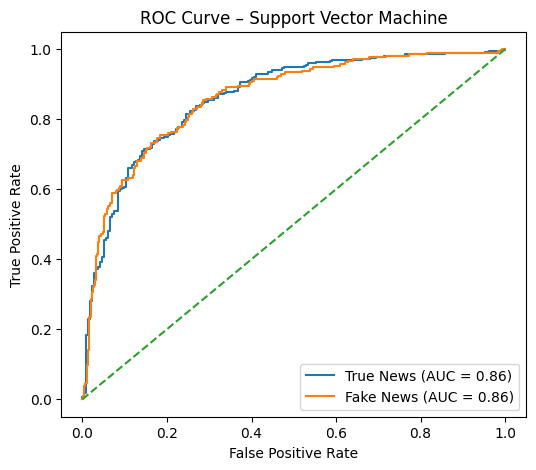

In [195]:
# Decision scores for SVM
y_score_svm = best_svm.decision_function(X_test_tfidf)


# TRUE news
fpr_true, tpr_true, _ = roc_curve(y_test, y_score_svm)
auc_true = auc(fpr_true, tpr_true)

# FAKE news
fpr_fake, tpr_fake, _ = roc_curve(1 - y_test, -y_score_svm)
auc_fake = auc(fpr_fake, tpr_fake)

plt.figure(figsize=(6,5))
plt.plot(fpr_true, tpr_true, label=f'True News (AUC = {auc_true:.2f})')
plt.plot(fpr_fake, tpr_fake, label=f'Fake News (AUC = {auc_fake:.2f})')
plt.plot([0,1], [0,1], linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – Support Vector Machine')
plt.legend()
plt.show()

- `decision_function()`: Computes decision scores from the trained SVM model for ROC analysis.  
- `roc_curve()`: Calculates false positive rate (FPR) and true positive rate (TPR) for different thresholds.  
- `auc()`: Computes the Area Under the Curve (AUC) to summarize ROC performance.  
- `plt.plot()`: Plots ROC curves for both True News and Fake News classes.  
- `plt.plot([0,1],[0,1])`: Draws the diagonal baseline representing random classification.  

**Insights:**

The ROC curves show how effectively the SVM model separates true and fake news across different decision thresholds. Higher AUC values indicate stronger discriminative power, while curves closer to the diagonal suggest weaker classification performance.


---
# Precision-Recall Curve

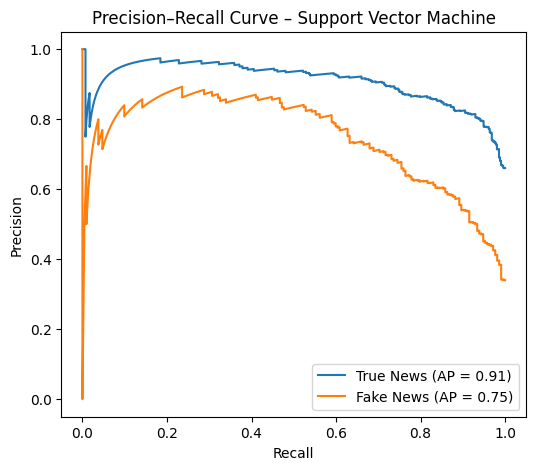

In [199]:
# TRUE news
precision_true, recall_true, _ = precision_recall_curve(y_test, y_score_svm)
ap_true = average_precision_score(y_test, y_score_svm)

# FAKE news
precision_fake, recall_fake, _ = precision_recall_curve(1 - y_test, -y_score_svm)
ap_fake = average_precision_score(1 - y_test, -y_score_svm)

plt.figure(figsize=(6,5))
plt.plot(recall_true, precision_true, label=f'True News (AP = {ap_true:.2f})')
plt.plot(recall_fake, precision_fake, label=f'Fake News (AP = {ap_fake:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision–Recall Curve – Support Vector Machine')
plt.legend()
plt.show()

- `precision_recall_curve()`: Computes precision and recall values for different decision thresholds.  
- `average_precision_score()`: Calculates the Average Precision (AP) score to summarize precision–recall performance.  
- `plt.plot()`: Plots precision–recall curves for both True News and Fake News classes.  

**Insights:**

The precision–recall curves illustrate how well the SVM model balances precision and recall for true and fake news. Higher Average Precision values indicate better performance, especially important for imbalanced datasets where precision–recall analysis provides more meaningful insights than accuracy alone.


---
# Comparison Graph After Tuning

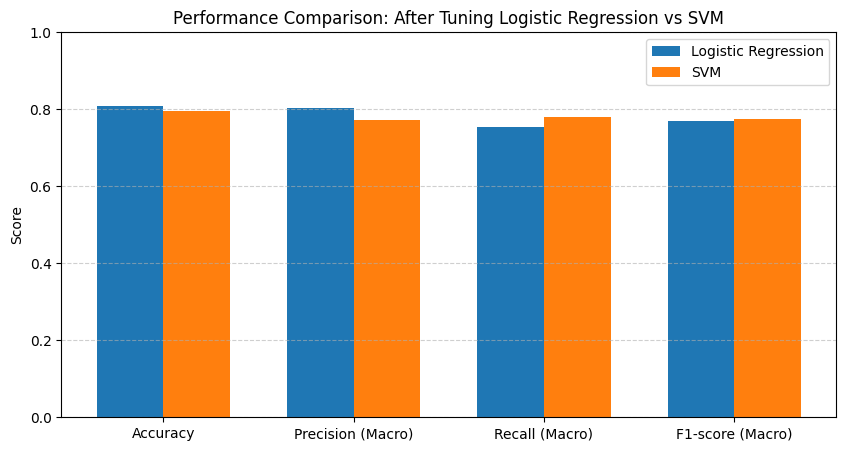

In [203]:
# Compute metrics for Logistic Regression
acc_lr = accuracy_score(y_test, best_pred_lr)
prec_lr, rec_lr, f1_lr, _ = precision_recall_fscore_support(
    y_test, best_pred_lr, average='macro'
)

# Compute metrics for SVM
acc_svm = accuracy_score(y_test, best_pred_svm)
prec_svm, rec_svm, f1_svm, _ = precision_recall_fscore_support(
    y_test, best_pred_svm, average='macro'
)

# Metrics & scores 
metrics = ['Accuracy', 'Precision (Macro)', 'Recall (Macro)', 'F1-score (Macro)']

lr_scores = [acc_lr, prec_lr, rec_lr, f1_lr]
svm_scores = [acc_svm, prec_svm, rec_svm, f1_svm]

x = np.arange(len(metrics))
width = 0.35

# Plot 
plt.figure(figsize=(10, 5))
plt.bar(x - width/2, lr_scores, width, label='Logistic Regression')
plt.bar(x + width/2, svm_scores, width, label='SVM')

plt.xticks(x, metrics)
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('Performance Comparison: After Tuning Logistic Regression vs SVM')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

**Insights:**

This bar chart compares the performance of Logistic Regression and SVM **after hyperparameter tuning**. It helps identify which model performs better overall and across individual metrics such as precision, recall, and F1-score, supporting informed model selection for fake news classification.


---
# Comparison Table

In [207]:
# Create comparison table
comparison_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machine'],
    'Accuracy': [acc_lr, acc_svm],
    'Precision (Macro)': [prec_lr, prec_svm],
    'Recall (Macro)': [rec_lr, rec_svm],
    'F1-score (Macro)': [f1_lr, f1_svm]
})

# Display table
comparison_df

,Model,Accuracy,Precision (Macro),Recall (Macro),F1-score (Macro)
0,Logistic Regression,0.807692,0.802222,0.754763,0.769501
1,Support Vector Machine,0.794872,0.771398,0.780546,0.775338


**Insights:**

The comparison table provides a clear and concise summary of the tuned Logistic Regression and SVM models. It enables direct comparison across accuracy, precision, recall, and F1-score, helping determine which model performs better overall for fake news classification.


---
# Covid-19 News Aunthenticity Classification

In [214]:
def predict_news(title, text, model, vectorizer):
    # combine title and text (same as training)
    preprocessed_text = title + " " + text
    # apply TF-IDF transformation
    transformed_text = vectorizer.transform([preprocessed_text])
    # prediction
    prediction = model.predict(transformed_text)[0]
    if prediction == 1:
        return "True News"
    else: 
        return "Fake / Partially False News"

# Enter values
title_input = input("Enter news title: ")
text_input = input("Enter news content: ")

# Prediction using Logistic Regression (LR)
result = predict_news(title_input, text_input, best_lr, tfidf)
print("News Prediction:", result)

Enter news title:  Lack of containment measures fuels Covid spread in community
Enter news content:  While a new Covid sub-variant has been spreading unabated in communities for the past couple of weeks, no measure has been taken yet to curb the transmission.  Neither the health authorities nor the general public seem to be concerned about the high infection rate of the new variant, which is believed to be highly contagious and potentially deadly.  “The spread of a new sub-variant of Omicron is on the rise,” said Dr Rajiv Shrestha, an infectious disease expert at the Dhulikhel Hospital. “More people will get infected in the coming days. What concerns me more is that no one has taken the risk seriously. The virus variant hits the unvaccinated, elderly and immuno-compromised people harder.”  Currently, XBB.1.16 sub-variant of the Omicron has been circulating in Nepal. According to Dhulikhel Hospital, the sub-variant was detected in all nine swab samples of Covid-infected persons on which

News Prediction: True News


- `def predict_news(title, text, model, vectorizer)`: Defines a function to predict whether a news article is fake or real.  
- `preprocessed_text = title + " " + text`: Combines the title and text for consistent preprocessing.  
- `vectorizer.transform([preprocessed_text])`: Converts the combined text into TF-IDF features using the trained vectorizer.  
- `model.predict(transformed_text)`: Uses the trained model to predict the label of the input text.  
- `if prediction == 1: else:`: Returns a human-readable prediction ("True News" or "Fake / Partially False News").  
- `title_input = input()`: Takes user input for title and content.  
- `result = predict_news(title_input, text_input, best_svm, tfidf)`: Gets the prediction using the optimized SVM model.  
- `print("News Prediction:", result)`: Displays the prediction to the user.  

**Insights:**

This function allows real-time prediction of new articles using the trained and tuned LR model. It standardizes input, transforms it into TF-IDF features, and outputs whether the news is likely real or fake, demonstrating practical application of the trained NLP model.
